In [41]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [42]:
import yfinance as yf

In [43]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [44]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [45]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-01-25,4.395671,4.522736,4.375072,4.515291,427966132
2005-01-26,4.696458,4.700677,4.446050,4.449028,494161321
2005-01-27,4.667671,4.687028,4.596195,4.684546,266089645
2005-01-28,4.723758,4.831963,4.624488,4.715816,490158373
2005-01-31,4.854794,4.873159,4.758006,4.806896,385306832


In [46]:
google_data.shape

(5033, 5)

In [47]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,49.126851,49.624337,48.615345,49.105490,1.078637e+08
std,47.085991,47.578901,46.592493,47.055393,1.412571e+08
min,4.342810,4.427436,4.282751,4.350503,1.584340e+05
25%,13.357508,13.501200,13.228704,13.376616,2.645290e+07
50%,28.214880,28.512989,27.975495,28.272512,4.980600e+07
75%,65.442360,65.950034,64.984752,65.177313,1.314469e+08
max,201.899994,203.839996,199.783997,200.550003,1.650833e+09


In [48]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-01-25 to 2025-01-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5033 non-null   float64
 1   (High, GOOG)    5033 non-null   float64
 2   (Low, GOOG)     5033 non-null   float64
 3   (Open, GOOG)    5033 non-null   float64
 4   (Volume, GOOG)  5033 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [49]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [52]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

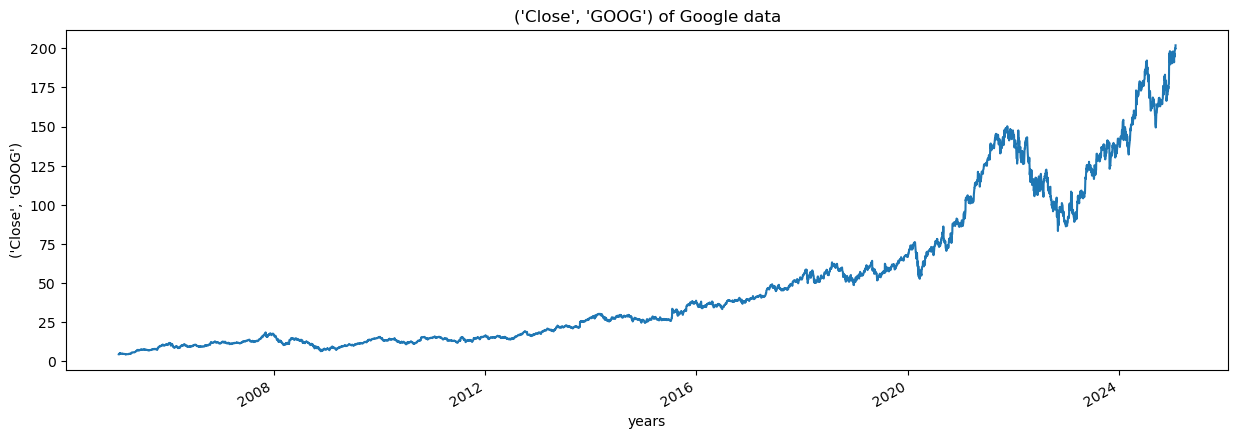

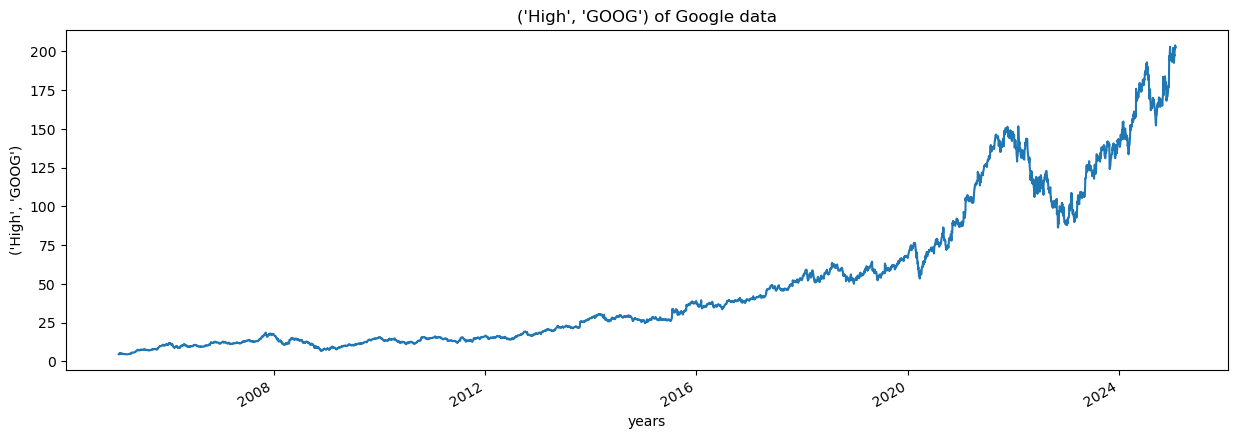

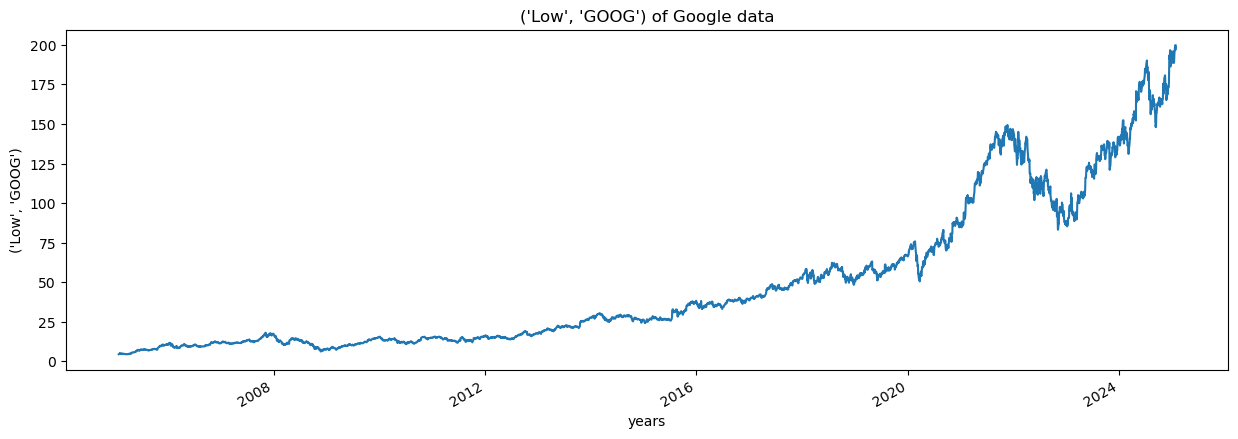

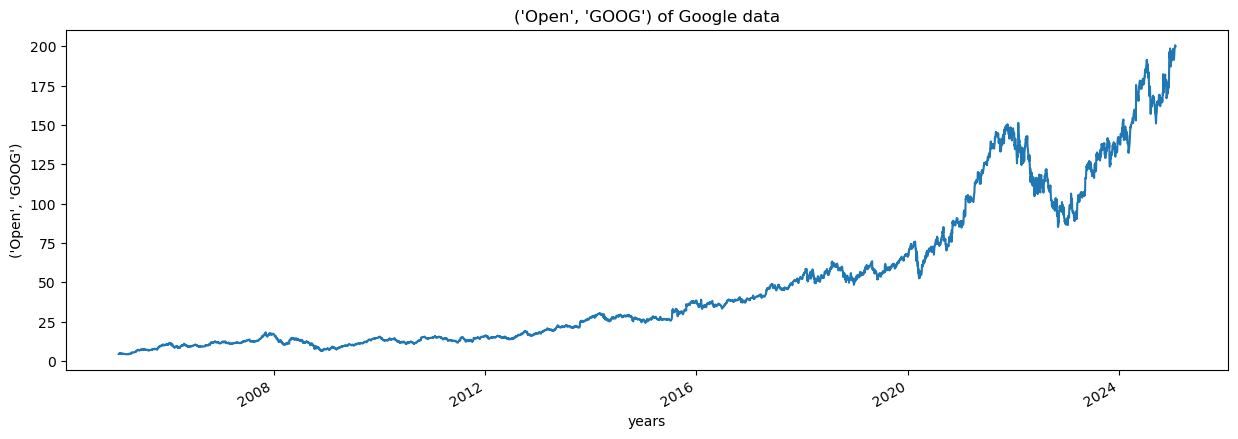

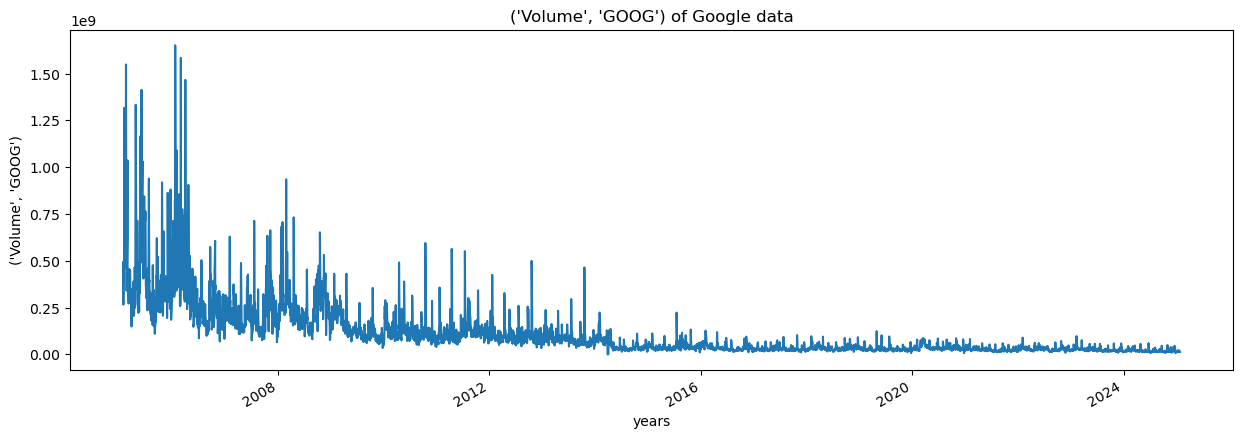

In [53]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [54]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [55]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [56]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [57]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [58]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 237
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [59]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [60]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-01-13         NaN
2006-01-17         NaN
2006-01-18         NaN
2006-01-19         NaN
2006-01-20    7.242953
Name: MA_for_250_days, dtype: float64

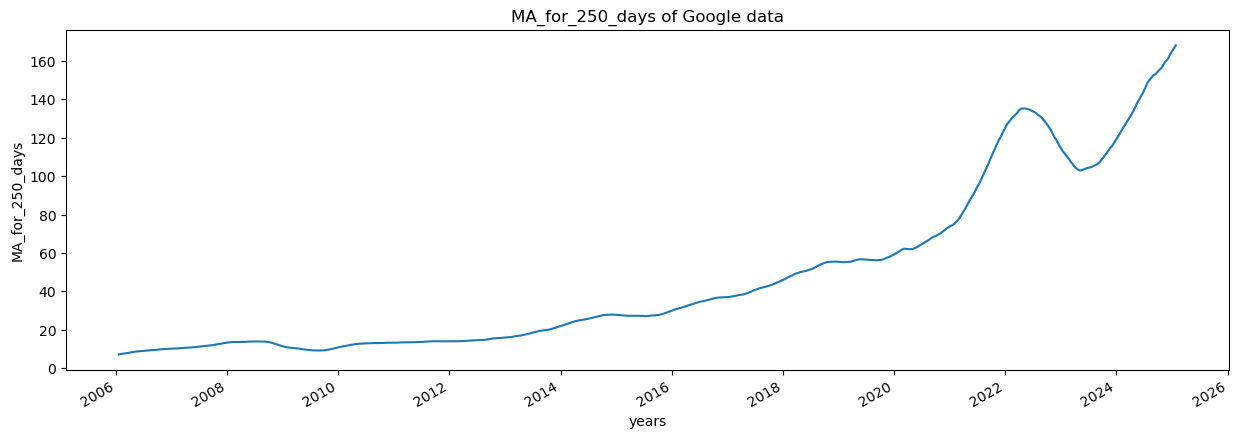

In [61]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

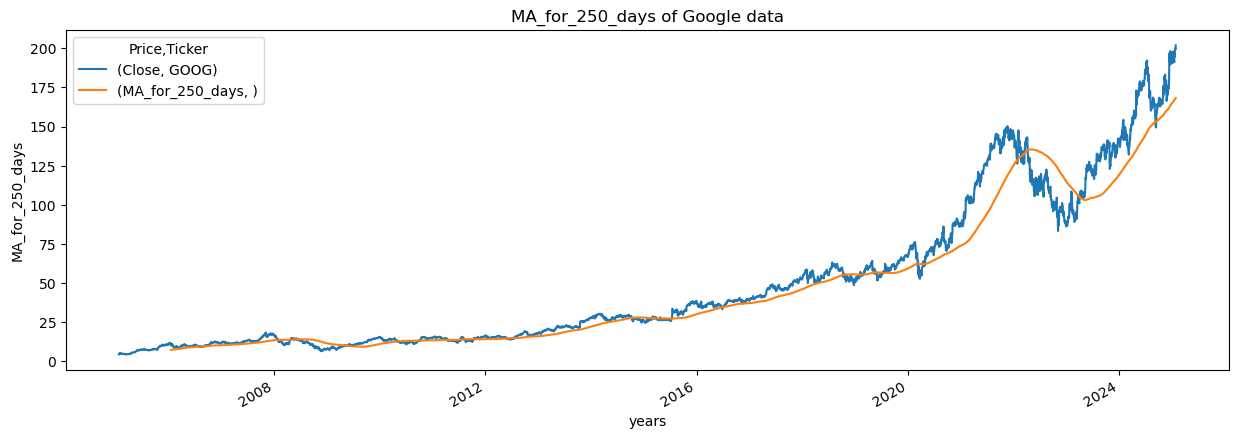

In [62]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

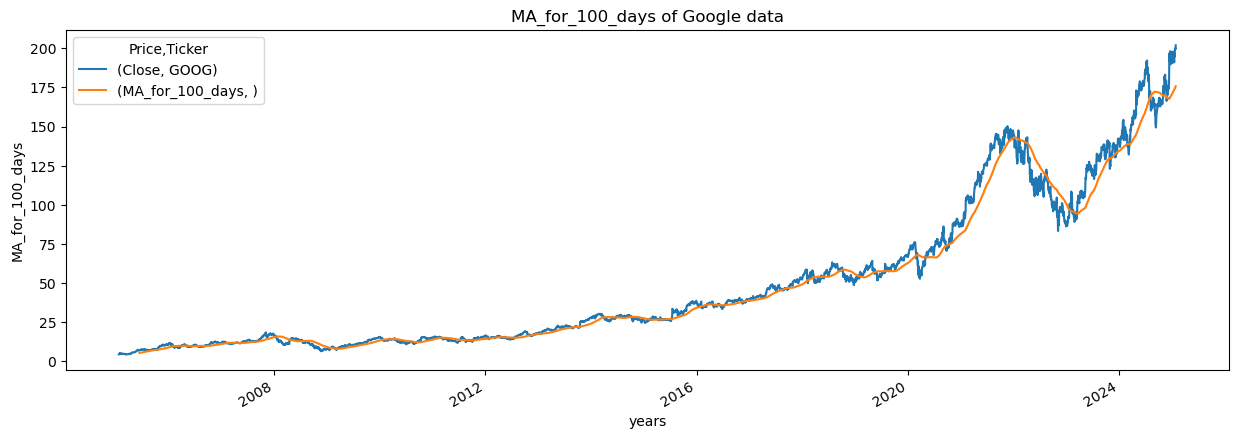

In [63]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

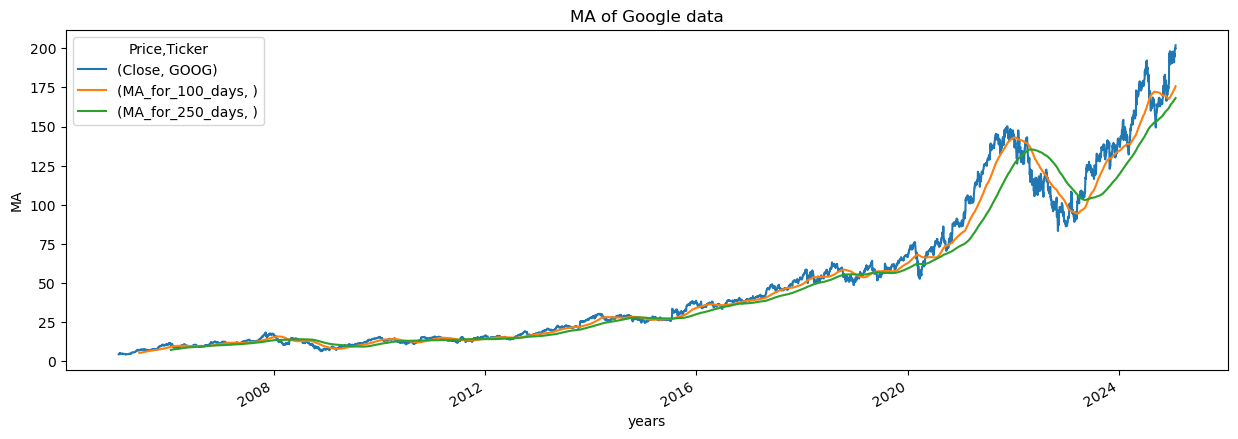

In [64]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [65]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-01-25,4.395671,NaN
2005-01-26,4.696458,0.068428
2005-01-27,4.667671,-0.006130
2005-01-28,4.723758,0.012016
2005-01-31,4.854794,0.027740


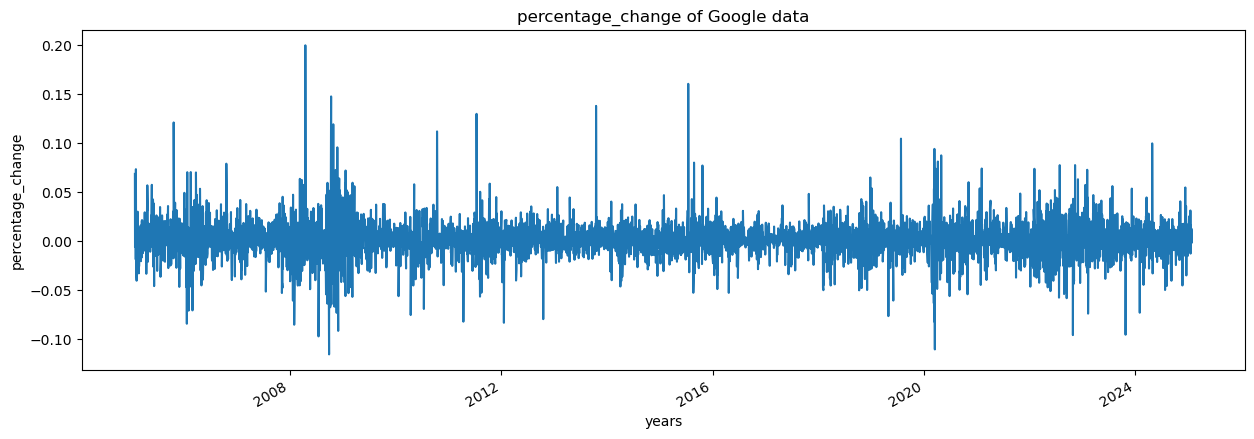

In [66]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [67]:
close_price = google_data[['Close']]

In [68]:
max(close_price.values),min(close_price.values) 

(array([201.8999939]), array([4.34280968]))

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[2.67574241e-04],
       [1.79010783e-03],
       [1.64438996e-03],
       ...,
       [9.90534411e-01],
       [9.88256605e-01],
       [1.00000000e+00]])

In [70]:
len(scaled_data)

5033

In [71]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [72]:
x_data[0],y_data[0]

(array([[2.67574241e-04],
        [1.79010783e-03],
        [1.64438996e-03],
        [1.92829507e-03],
        [2.59157545e-03],
        [2.12426306e-03],
        [3.89050215e-03],
        [4.50604986e-03],
        [3.68951131e-03],
        [2.64307826e-03],
        [2.97095072e-03],
        [2.08406345e-03],
        [1.63182441e-03],
        [1.55896306e-03],
        [2.26119036e-03],
        [2.54258043e-03],
        [2.94205913e-03],
        [2.87799318e-03],
        [2.88427354e-03],
        [2.05768207e-03],
        [2.38178921e-03],
        [1.74614048e-03],
        [1.36676279e-03],
        [1.63308193e-03],
        [1.39062913e-03],
        [1.28008562e-03],
        [1.50997046e-03],
        [1.37053053e-03],
        [1.73608997e-03],
        [1.28259342e-03],
        [7.98952577e-04],
        [6.26853328e-04],
        [3.52996313e-04],
        [0.00000000e+00],
        [4.54751665e-04],
        [7.66314978e-05],
        [5.40171323e-04],
        [6.34386381e-04],
        [7.3

In [73]:
int(len(x_data)*0.7)

3453

In [74]:
5034-100-int(len(x_data)*0.7)

1481

In [75]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [77]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [78]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\vihar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [80]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - loss: 2.3086e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - loss: 9.4199e-05


In [81]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [82]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [83]:
predictions

array([[0.28479123],
       [0.28302476],
       [0.2870207 ],
       ...,
       [1.0214599 ],
       [1.0270193 ],
       [1.0266707 ]], dtype=float32)

In [84]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 60.605366],
       [ 60.256386],
       [ 61.045815],
       ...,
       [206.13956 ],
       [207.23784 ],
       [207.16898 ]], dtype=float32)

In [85]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 56.91151428],
       [ 58.57752228],
       [ 59.4464035 ],
       ...,
       [200.02999878],
       [199.58000183],
       [201.8999939 ]])

In [86]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [87]:
rmse

6.316894364002477

In [88]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-03-08,56.911514,60.605366
2019-03-11,58.577522,60.256386
2019-03-12,59.446404,61.045815
2019-03-13,59.452381,62.135609
2019-03-14,59.065273,62.713089


<Figure size 640x480 with 0 Axes>

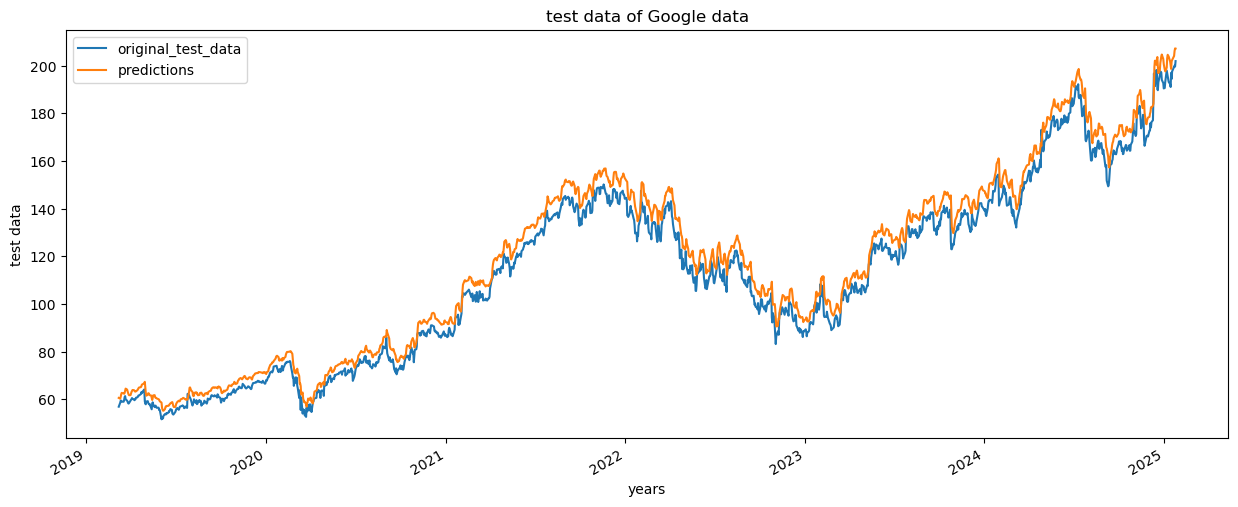

In [89]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

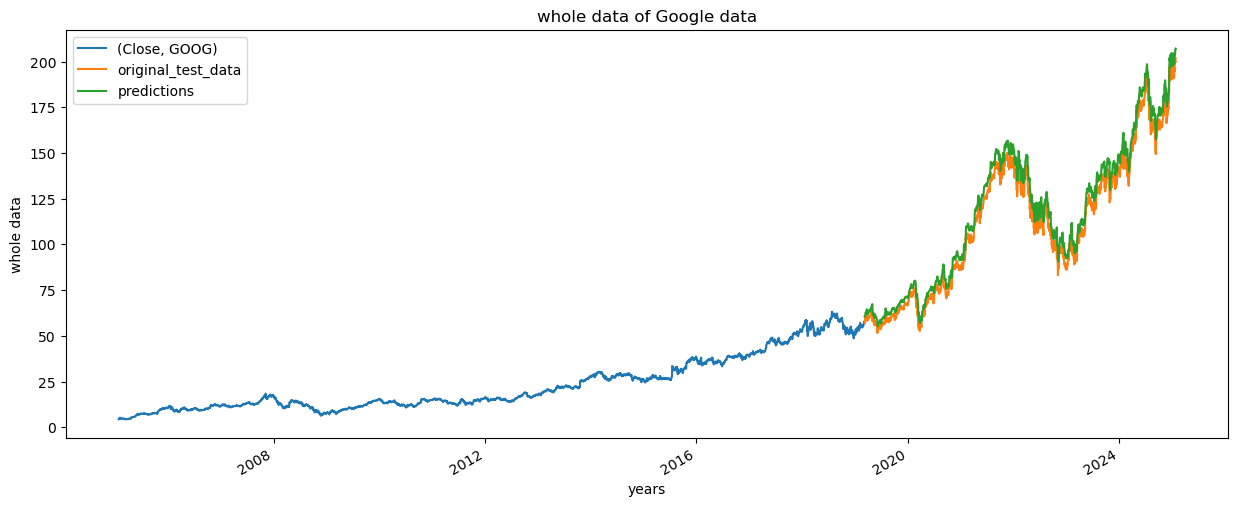

In [91]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [92]:
model.save("Latest_stock_price_model.keras")